# **Cezar Gabriel M. A. Lima - 11806980**

**Acurácias de teste obtidas:** <br>
S1 como treino: 96.00% <br>
S2 como treino: 94.00% <br>
S3 como treino: 96.00% <br>
S4 como treino: 92.00% <br>
S5 como treino: 90.00% <br>

Média: 93.60%  <br>

In [1]:
(96 + 94 + 96 + 92 + 90) / 5

93.6

# Baixando imagens:

In [2]:
url='http://www.lps.usp.br/hae/psi3471/ep1-2023/rice_1to50.zip'
import os; nomeArq=os.path.split(url)[1]
if not os.path.exists(nomeArq):
 print("Baixando o arquivo",nomeArq,"para diretorio default",os.getcwd())
 os.system("wget -nc -U 'Firefox/50.0' "+url)
else:
 print("O arquivo",nomeArq,"ja existe no diretorio default",os.getcwd())
print("Descompactando arquivos novos de",nomeArq)
os.system("unzip -u "+nomeArq)

Baixando o arquivo rice_1to50.zip para diretorio default /content
Descompactando arquivos novos de rice_1to50.zip


0

# Separando S1, S2, S3, S4, S5:

In [3]:
import os
import re
import shutil

# Definir o caminho da pasta de origem
pasta_origem = "/content/rice_1to50"

# Criar as pastas de destino, se não existirem
pastas_destino = ["/content/S1", "/content/S2", "/content/S3", "/content/S4", "/content/S5"]
for pasta_destino in pastas_destino:
    if not os.path.exists(pasta_destino):
        os.makedirs(pasta_destino)

# Definir o número máximo de arquivos a serem copiados em cada pasta de destino
num_arquivos_por_pasta = 10

# Obter a lista de pastas da pasta de origem
pastas = [item for item in os.listdir(pasta_origem) if os.path.isdir(os.path.join(pasta_origem, item)) and item != "orientacao"]

for pasta in pastas:
    pasta_origem_completa = os.path.join(pasta_origem, pasta)

    # Obter a lista de arquivos que não são pastas na pasta atual
    arquivos = [item for item in os.listdir(pasta_origem_completa) if not os.path.isdir(os.path.join(pasta_origem_completa, item))]

    # Ordenar os arquivos usando uma função de classificação personalizada
    arquivos_ordenados = sorted(arquivos, key=lambda x: int(re.findall(r'\((\d+)\)', x)[0]))
    # Dividir os arquivos em grupos de tamanho "num_arquivos_por_pasta"
    grupos_arquivos = [arquivos_ordenados[i:i+num_arquivos_por_pasta] for i in range(0, len(arquivos_ordenados), num_arquivos_por_pasta)]

    # Para cada grupo de arquivos
    for i, grupo in enumerate(grupos_arquivos):
        # Definir o número da pasta de destino
        numero_pasta_destino = i + 1
        pasta_destino = f"/content/S{numero_pasta_destino}"

        # Copiar os arquivos para a pasta de destino
        for arquivo in grupo:
            arquivo_origem = os.path.join(pasta_origem_completa, arquivo)
            arquivo_destino = os.path.join(pasta_destino, arquivo)
            shutil.copy(arquivo_origem, arquivo_destino)

# Carregando imagens:

In [9]:
import os
import re
import numpy as np
from PIL import Image

def carregar_imagens_e_rotulos(pasta):
    imagens = []
    rotulos = []

    # Obter a lista de arquivos da pasta
    arquivos = os.listdir(pasta)

    # Para cada arquivo na pasta
    for arquivo in arquivos:
        # Caminho completo do arquivo
        caminho_arquivo = os.path.join(pasta, arquivo)

        # Carregar a imagem usando PIL
        imagem = Image.open(caminho_arquivo)

        # Converter a imagem para um array NumPy
        imagem_array = np.array(imagem)

        # Adicionar a imagem e o rótulo às listas
        imagens.append(imagem_array)
        rotulo = re.match(r'^(\w+)', arquivo).group(1)
        rotulos.append(rotulo)

    return np.array(imagens), np.array(rotulos)

pasta_s1 = "/content/S1"
pasta_s2 = "/content/S2"
pasta_s3 = "/content/S3"
pasta_s4 = "/content/S4"
pasta_s5 = "/content/S5"

In [10]:
# Carregar imagens e rótulos das pastas S2, S3, S4 e S5
AX1, rotulos_AX1 = carregar_imagens_e_rotulos(pasta_s1)
AX2, rotulos_AX2 = carregar_imagens_e_rotulos(pasta_s2)
AX3, rotulos_AX3 = carregar_imagens_e_rotulos(pasta_s3)
AX4, rotulos_AX4 = carregar_imagens_e_rotulos(pasta_s4)
AX5, rotulos_AX5 = carregar_imagens_e_rotulos(pasta_s5)

Primeiro, faremos o subconjunto S1 como teste e o restante como treinamento. Adiante, o mesmo ocorrerá para cada um dos subconjuntos sendo teste. Por fim, a média das acurácias será calculada.

In [11]:
# Concatenar as imagens e os rótulos de todas as pastas
AX = np.concatenate((AX2, AX3, AX4, AX5), axis=0)
rotulos_AX = np.concatenate((rotulos_AX2, rotulos_AX3, rotulos_AX4, rotulos_AX5), axis=0)

# Imprimir as formas dos arrays de imagens e rótulos
print("Shape de AX:", AX.shape)
print("Shape de rótulos_AX:", rotulos_AX.shape)

# Carregar imagens e rótulos da pasta S1
pasta_s1 = "/content/S1"

QX, rotulos_QX = carregar_imagens_e_rotulos(pasta_s1)

# Imprimir as formas dos arrays de imagens e rótulos
print("Shape de QX:", QX.shape)
print("Shape de rótulos_QX:", rotulos_QX.shape)


Shape de AX: (200, 250, 250, 3)
Shape de rótulos_AX: (200,)
Shape de QX: (50, 250, 250, 3)
Shape de rótulos_QX: (50,)


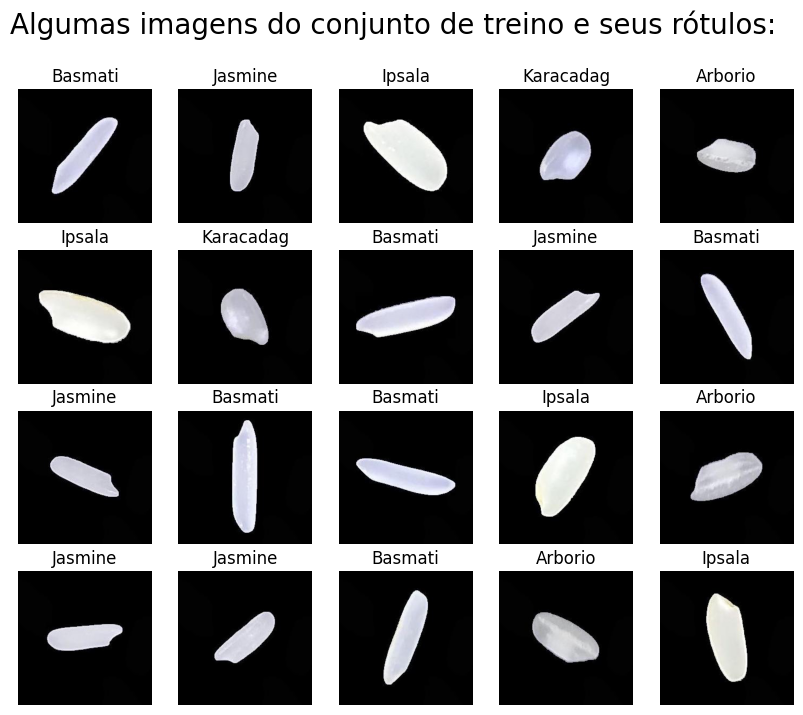

In [ ]:
from matplotlib import pyplot as plt
f = plt.figure(figsize=(10, 8))
plt.suptitle("Algumas imagens do conjunto de treino e seus rótulos:", size="20")

for i in range(20):
  f.add_subplot(4,5,i+1)
  plt.imshow( AX[i,:,:])
  plt.title(rotulos_AX[i])
  plt.axis("off");
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

# one-hot encoding:
AY = LabelEncoder().fit_transform(rotulos_AX)
QY = LabelEncoder().fit_transform(rotulos_QX)

In [ ]:
AX.shape

(200, 250, 250, 3)

# Configurando, treinando e realizando inferência na CNN (S1 como conjunto de teste):

In [13]:
#cnn1.py - pos2021
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras import optimizers
import numpy as np; import sys; import os; from time import time

AX=255-AX; QX=255-QX
nclasses = 5

nl, nc = AX.shape[1], AX.shape[2]
AX = (AX.astype('float32') / 255.0)-0.5 # -0.5 a +0.5
QX = (QX.astype('float32') / 255.0)-0.5 # -0.5 a +0.5
AX = np.expand_dims(AX,axis=4) # AX [60000,28,28,1]
QX = np.expand_dims(QX,axis=4)

In [ ]:
model = Sequential() #
model.add(Conv2D(20, kernel_size=(5,5), activation='relu', input_shape=(nl, nc, 3) ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(40, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))


from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn1.png', show_shapes=True);

model.summary()
opt=optimizers.Adam()

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

t0=time()

model.fit(AX, AY, batch_size=100, epochs=15, verbose=2)

t1=time(); print("Tempo de treino: %.2f s"%(t1-t0))

score = model.evaluate(QX, QY, verbose=False)
print('Test loss: %.4f'%(score[0]))
print('Test accuracy: %.2f %%'%(100*score[1]))
print('Test error: %.2f %%'%(100*(1-score[1])))

t2=time()

QP2=model.predict(QX); QP=np.argmax(QP2,1)

t3=time(); print("Tempo de predicao: %.2f s"%(t3-t2))

nerro=np.count_nonzero(QP-QY); print("nerro=%d"%(nerro))
model.save('cnn1.h5')

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_123 (Conv2D)         (None, 246, 246, 20)      1520      
                                                                 
 max_pooling2d_119 (MaxPooli  (None, 123, 123, 20)     0         
 ng2D)                                                           
                                                                 
 conv2d_124 (Conv2D)         (None, 119, 119, 40)      20040     
                                                                 
 max_pooling2d_120 (MaxPooli  (None, 59, 59, 40)       0         
 ng2D)                                                           
                                                                 
 flatten_59 (Flatten)        (None, 139240)            0         
                                                                 
 dropout_60 (Dropout)        (None, 139240)          

In [ ]:
#from tensorflow.keras.models import load_model
## Carregar o modelo
#model = load_model('cnn1 Test Acc: 94.h5')
## Fazer previsões usando o modelo carregado
#QP2 = model.predict(QX); QP=np.argmax(QP2,1)
#nerro=np.count_nonzero(QP-QY); print("nerro=%d"%(nerro))

# S2 como conjunto de teste

In [ ]:
# Concatenar as imagens e os rótulos de todas as pastas
AX = np.concatenate((AX1, AX3, AX4, AX5), axis=0)
rotulos_AX = np.concatenate((rotulos_AX1, rotulos_AX3, rotulos_AX4, rotulos_AX5), axis=0)

QX, rotulos_QX = carregar_imagens_e_rotulos(pasta_s2)

# Imprimir as formas dos arrays de imagens e rótulos
print("Shape de AX:", AX.shape)
print("Shape de rótulos_AX:", rotulos_AX.shape)
print("Shape de QX:", QX.shape)
print("Shape de rótulos_QX:", rotulos_QX.shape)

# one-hot encoding:
AY = LabelEncoder().fit_transform(rotulos_AX)
QY = LabelEncoder().fit_transform(rotulos_QX)

Shape de AX: (200, 250, 250, 3)
Shape de rótulos_AX: (200,)
Shape de QX: (50, 250, 250, 3)
Shape de rótulos_QX: (50,)


In [ ]:
#cnn1.py - pos2021
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras import optimizers
import numpy as np; import sys; import os; from time import time

AX=255-AX; QX=255-QX
nclasses = 5

nl, nc = AX.shape[1], AX.shape[2]
AX = (AX.astype('float32') / 255.0)-0.5 # -0.5 a +0.5
QX = (QX.astype('float32') / 255.0)-0.5 # -0.5 a +0.5
AX = np.expand_dims(AX,axis=4) # AX [60000,28,28,1]
QX = np.expand_dims(QX,axis=4)

In [ ]:
model = Sequential() #
model.add(Conv2D(20, kernel_size=(5,5), activation='relu', input_shape=(nl, nc, 3) ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(40, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))


#from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='cnn1.png', show_shapes=True);

model.summary()
opt=optimizers.Adam()

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

t0=time()

model.fit(AX, AY, batch_size=100, epochs=15, verbose=2)

t1=time(); print("Tempo de treino: %.2f s"%(t1-t0))

score = model.evaluate(QX, QY, verbose=False)
print('Test loss: %.4f'%(score[0]))
print('Test accuracy: %.2f %%'%(100*score[1]))
print('Test error: %.2f %%'%(100*(1-score[1])))

t2=time()

QP2=model.predict(QX); QP=np.argmax(QP2,1)

t3=time(); print("Tempo de predicao: %.2f s"%(t3-t2))

nerro=np.count_nonzero(QP-QY); print("nerro=%d"%(nerro))
model.save('cnn2.h5')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 246, 246, 20)      1520      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 123, 123, 20)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 119, 119, 40)      20040     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 59, 59, 40)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 139240)            0         
                                                                 
 dropout_9 (Dropout)         (None, 139240)           

# S3 como conjunto de teste

In [ ]:
# Concatenar as imagens e os rótulos de todas as pastas
AX = np.concatenate((AX1, AX2, AX4, AX5), axis=0)
rotulos_AX = np.concatenate((rotulos_AX1, rotulos_AX2, rotulos_AX4, rotulos_AX5), axis=0)

QX, rotulos_QX = carregar_imagens_e_rotulos(pasta_s3)

# Imprimir as formas dos arrays de imagens e rótulos
print("Shape de AX:", AX.shape)
print("Shape de rótulos_AX:", rotulos_AX.shape)
print("Shape de QX:", QX.shape)
print("Shape de rótulos_QX:", rotulos_QX.shape)

# one-hot encoding:
AY = LabelEncoder().fit_transform(rotulos_AX)
QY = LabelEncoder().fit_transform(rotulos_QX)

Shape de AX: (200, 250, 250, 3)
Shape de rótulos_AX: (200,)
Shape de QX: (50, 250, 250, 3)
Shape de rótulos_QX: (50,)


In [ ]:
model = Sequential() #
model.add(Conv2D(20, kernel_size=(5,5), activation='relu', input_shape=(nl, nc, 3) ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(40, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))


#from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='cnn1.png', show_shapes=True);

model.summary()
opt=optimizers.Adam()

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

t0=time()

model.fit(AX, AY, batch_size=100, epochs=15, verbose=2)

t1=time(); print("Tempo de treino: %.2f s"%(t1-t0))

score = model.evaluate(QX, QY, verbose=False)
print('Test loss: %.4f'%(score[0]))
print('Test accuracy: %.2f %%'%(100*score[1]))
print('Test error: %.2f %%'%(100*(1-score[1])))

t2=time()

QP2=model.predict(QX); QP=np.argmax(QP2,1)

t3=time(); print("Tempo de predicao: %.2f s"%(t3-t2))

nerro=np.count_nonzero(QP-QY); print("nerro=%d"%(nerro))
model.save('cnn3.h5')

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 246, 246, 20)      1520      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 123, 123, 20)     0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 119, 119, 40)      20040     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 59, 59, 40)       0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 139240)            0         
                                                                 
 dropout_20 (Dropout)        (None, 139240)          

#S4 como conjunto de teste

In [ ]:
# Concatenar as imagens e os rótulos de todas as pastas
AX = np.concatenate((AX1, AX2, AX3, AX5), axis=0)
rotulos_AX = np.concatenate((rotulos_AX1, rotulos_AX2, rotulos_AX3, rotulos_AX5), axis=0)

QX, rotulos_QX = carregar_imagens_e_rotulos(pasta_s4)

# Imprimir as formas dos arrays de imagens e rótulos
print("Shape de AX:", AX.shape)
print("Shape de rótulos_AX:", rotulos_AX.shape)
print("Shape de QX:", QX.shape)
print("Shape de rótulos_QX:", rotulos_QX.shape)

# one-hot encoding:
AY = LabelEncoder().fit_transform(rotulos_AX)
QY = LabelEncoder().fit_transform(rotulos_QX)

Shape de AX: (200, 250, 250, 3)
Shape de rótulos_AX: (200,)
Shape de QX: (50, 250, 250, 3)
Shape de rótulos_QX: (50,)


In [ ]:
model = Sequential() #
model.add(Conv2D(20, kernel_size=(5,5), activation='relu', input_shape=(nl, nc, 3) ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(40, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))


#from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='cnn1.png', show_shapes=True);

model.summary()
opt=optimizers.Adam()

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

t0=time()

model.fit(AX, AY, batch_size=100, epochs=15, verbose=2)

t1=time(); print("Tempo de treino: %.2f s"%(t1-t0))

score = model.evaluate(QX, QY, verbose=False)
print('Test loss: %.4f'%(score[0]))
print('Test accuracy: %.2f %%'%(100*score[1]))
print('Test error: %.2f %%'%(100*(1-score[1])))

t2=time()

QP2=model.predict(QX); QP=np.argmax(QP2,1)

t3=time(); print("Tempo de predicao: %.2f s"%(t3-t2))

nerro=np.count_nonzero(QP-QY); print("nerro=%d"%(nerro))
model.save('cnn4.h5')

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 246, 246, 20)      1520      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 123, 123, 20)     0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 119, 119, 40)      20040     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 59, 59, 40)       0         
 g2D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 139240)            0         
                                                                 
 dropout_24 (Dropout)        (None, 139240)          

#S5 como conjunto de teste

In [ ]:
# Concatenar as imagens e os rótulos de todas as pastas
AX = np.concatenate((AX1, AX2, AX3, AX4), axis=0)
rotulos_AX = np.concatenate((rotulos_AX1, rotulos_AX2, rotulos_AX3, rotulos_AX4), axis=0)

QX, rotulos_QX = carregar_imagens_e_rotulos(pasta_s5)

# Imprimir as formas dos arrays de imagens e rótulos
print("Shape de AX:", AX.shape)
print("Shape de rótulos_AX:", rotulos_AX.shape)
print("Shape de QX:", QX.shape)
print("Shape de rótulos_QX:", rotulos_QX.shape)

# one-hot encoding:
AY = LabelEncoder().fit_transform(rotulos_AX)
QY = LabelEncoder().fit_transform(rotulos_QX)

Shape de AX: (200, 250, 250, 3)
Shape de rótulos_AX: (200,)
Shape de QX: (50, 250, 250, 3)
Shape de rótulos_QX: (50,)


In [ ]:
model = Sequential() #
model.add(Conv2D(20, kernel_size=(5,5), activation='relu', input_shape=(nl, nc, 3) ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(40, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))


#from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='cnn1.png', show_shapes=True);

model.summary()
opt=optimizers.Adam()

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

t0=time()

model.fit(AX, AY, batch_size=100, epochs=15, verbose=2)

t1=time(); print("Tempo de treino: %.2f s"%(t1-t0))

score = model.evaluate(QX, QY, verbose=False)
print('Test loss: %.4f'%(score[0]))
print('Test accuracy: %.2f %%'%(100*score[1]))
print('Test error: %.2f %%'%(100*(1-score[1])))

t2=time()

QP2=model.predict(QX); QP=np.argmax(QP2,1)

t3=time(); print("Tempo de predicao: %.2f s"%(t3-t2))

nerro=np.count_nonzero(QP-QY); print("nerro=%d"%(nerro))
model.save('cnn5.h5')

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 246, 246, 20)      1520      
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 123, 123, 20)     0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 119, 119, 40)      20040     
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 59, 59, 40)       0         
 g2D)                                                            
                                                                 
 flatten_39 (Flatten)        (None, 139240)            0         
                                                                 
 dropout_39 (Dropout)        (None, 139240)          